In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
%matplotlib inline

## Building A Handwritten Digits Classifier

I will compare te k-nearest neighbour algorithm with neural networks with different numbers of neurons and layers. The data used is from `sklearn` called `load_digits`. It contains pictures of handwritten numbers as well as what number the picture should represent.

In [2]:
digits_data = load_digits()
digits_data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
features = pd.DataFrame(digits_data['data'])
target = pd.Series(digits_data['target'])

In [4]:
features.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


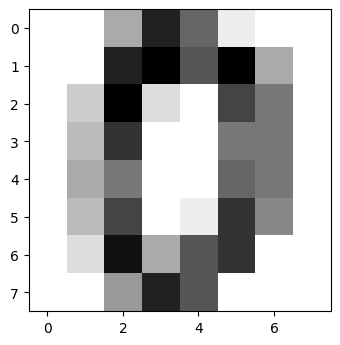

In [5]:
first_image = features.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)
plt.imshow(np_image, cmap='gray_r')

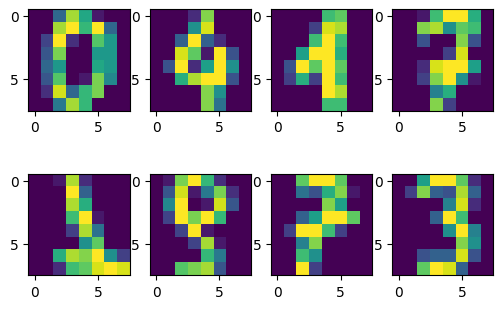

In [6]:
fig,ax = plt.subplots(2,4)
ax[0,0].imshow(features.iloc[0].values.reshape(8,8))
ax[0,1].imshow(features.iloc[100].values.reshape(8,8))
ax[0,2].imshow(features.iloc[200].values.reshape(8,8))
ax[0,3].imshow(features.iloc[300].values.reshape(8,8))
ax[1,0].imshow(features.iloc[1000].values.reshape(8,8))
ax[1,1].imshow(features.iloc[1100].values.reshape(8,8))
ax[1,2].imshow(features.iloc[1200].values.reshape(8,8))
ax[1,3].imshow(features.iloc[1300].values.reshape(8,8))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
     features, target, test_size=0.33, random_state=42
)

In [8]:
def train(features, target, neighbours = 3):
    neigh = KNeighborsClassifier(n_neighbors=neighbours)
    neigh.fit(features, target)
    return neigh

def test(model, test_features, test_target):
    pred = model.predict(test_features)
    return accuracy_score(test_target,pred)

def cross_validate(features, target,  n=3):
    fold_acc = []
    kf = KFold(n_splits = 4, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(features):
        train_features, test_features = features.loc[train_index], features.loc[test_index]
        train_labels, test_labels = target.loc[train_index], target.loc[test_index]
        model = train(train_features, train_labels, n)
        overall_accuracy = test(model, test_features, test_labels)
        fold_acc.append(overall_accuracy)
    return fold_acc

In [9]:
cross_validate(features, target, 5)

[0.98, 0.9910913140311804, 0.9866369710467706, 0.9821826280623608]

In [11]:
mean_acc = []
for k in range(2,6):
    mean = np.mean(cross_validate(features, target,k))
    mean_acc.append(mean)

Text(0.5, 1.0, 'Mean Accuracy per neighbour')

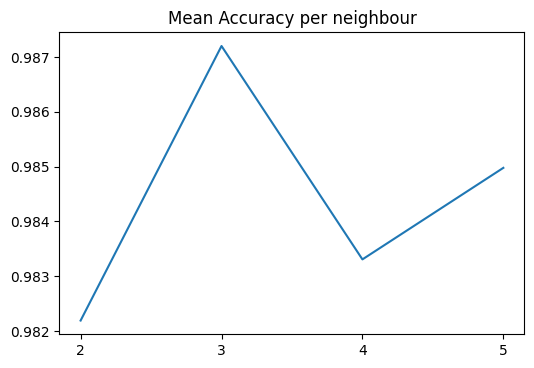

In [12]:
plt.plot(range(2,6),mean_acc)
plt.xticks(range(2,6))
plt.title('Mean Accuracy per neighbour')

Great results but high memory usage. Therefore, I will try a neural network:

In [13]:
def neural_network(features,target,hidden_layer = (1,1)):
    clf = MLPClassifier(
        random_state=42, 
        hidden_layer_sizes = hidden_layer,
        #max_iter = 300
    ).fit(features, target)
    return clf

def cross_validate_nn(features, target,  hl = (1,1)):
    fold_acc = []
    kf = KFold(n_splits = 4, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(features):
        train_features, test_features = features.loc[train_index], features.loc[test_index]
        train_labels, test_labels = target.loc[train_index], target.loc[test_index]
        model = neural_network(train_features, train_labels, hl)
        overall_accuracy = test(model, test_features, test_labels)
        fold_acc.append(overall_accuracy)
    return fold_acc

In [14]:
hl_list = [
    (8),(16),(32),(64),(128),(256)
]

acc_nn = []
for hl in hl_list:
    acc_nn.append(np.mean(cross_validate_nn(features,target,hl = hl)))
np.mean(acc_nn)

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural

0.9595663202177679

In [15]:
acc_nn

[0.9181910418213313,
 0.9527010640930462,
 0.9693986636971047,
 0.9649529819351645,
 0.9738530066815145,
 0.978301163078446]

In [16]:
x = [8*x for x in [1,2,4,8,16,32]]
x

[8, 16, 32, 64, 128, 256]

Text(0.5, 1.0, 'Neural network: Accuracy per neuron with single hidden layer')

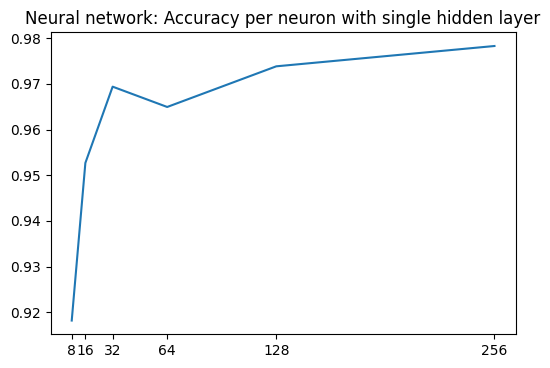

In [17]:
plt.xticks(x)
plt.plot(x,acc_nn)
plt.title('Neural network: Accuracy per neuron with single hidden layer')

### Is one of the models overfitting?

In [18]:
def cross_validate_2(features, target,  n=3):
    fold_acc_test = []
    fold_acc_train = []
    kf = KFold(n_splits = 4, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(features):
        train_features, test_features = features.loc[train_index], features.loc[test_index]
        train_labels, test_labels = target.loc[train_index], target.loc[test_index]
        model = train(train_features, train_labels, n)
        overall_accuracy = test(model, test_features, test_labels)
        fold_acc_test.append(overall_accuracy)
        train_acc = test(model, train_features, train_labels)
        fold_acc_train.append(train_acc)
    return (np.mean(fold_acc_test), np.mean(fold_acc_train) )

In [19]:
mean_acc_test = []
mean_acc_train = []
for k in range(2,6):
    (testing, training) = cross_validate_2(features,target, k)
    mean_acc_test.append(testing)
    mean_acc_train.append(training)

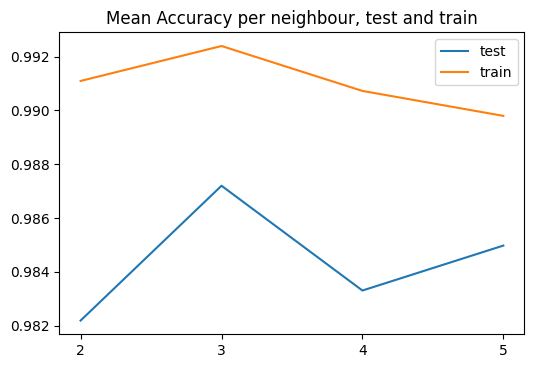

In [20]:
plt.plot(range(2,6),mean_acc_test,label = 'test')
plt.plot(range(2,6),mean_acc_train, label = 'train')
plt.xticks(range(2,6))
plt.title('Mean Accuracy per neighbour, test and train')
plt.legend()

The two means are quite close together, therfore I wouldn't assume that the model overfits.

In [21]:
def cross_validate_nn_2(features, target,  hl = (1,1)):
    fold_acc_test = []
    fold_acc_train = []
    kf = KFold(n_splits = 4, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(features):
        train_features, test_features = features.loc[train_index], features.loc[test_index]
        train_labels, test_labels = target.loc[train_index], target.loc[test_index]
        model = neural_network(train_features, train_labels, hl)
        overall_accuracy = test(model, test_features, test_labels)
        fold_acc_test.append(overall_accuracy)
        train_acc = test(model, train_features, train_labels)
        fold_acc_train.append(train_acc)
    return (np.mean(fold_acc_test), np.mean(fold_acc_train) )

In [22]:
hl_list = [
    (8),(16),(32),(64),(128),(256)
]

acc_nn_test = []
acc_nn_train = []
for hl in hl_list:
    (testing, training) = cross_validate_nn_2(features,target,hl = hl)
    acc_nn_test.append(testing)
    acc_nn_train.append(training)

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural

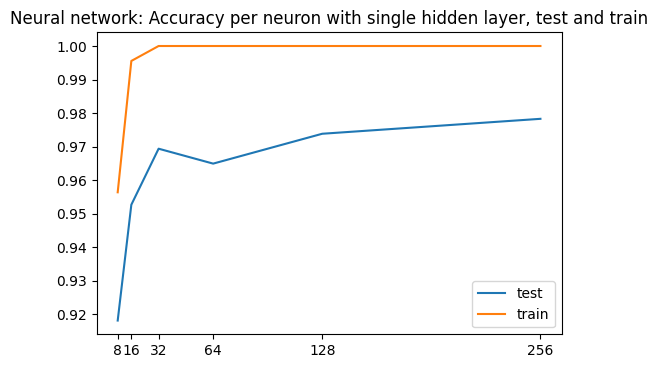

In [23]:
plt.xticks(x)
plt.plot(x,acc_nn_test, label = 'test')
plt.plot(x,acc_nn_train, label = 'train')
plt.title('Neural network: Accuracy per neuron with single hidden layer, test and train')
plt.legend()

The two scores are not that far apart, however, it is a bit striking that the model reaches 100% on the trainings set. 

Summary: K-nearest neighbours performs slightly better.

### Using two hidden layers instead of one:

In [24]:
(testing, training) = cross_validate_nn_2(features,target,hl = (64,64))
print(testing,training)

0.9760789408562237 1.0


In [25]:
cross_validate_nn(features,target, hl = (64,64))

[0.9622222222222222,
 0.9821826280623608,
 0.9799554565701559,
 0.9799554565701559]

In [26]:
hl_list = [
    (8,8),(16,16),(32,32),(64,64),(128,128)
]

acc_nn = []
for hl in hl_list:
    acc_nn.append(np.mean(cross_validate_nn(features,target,hl = hl)))
np.mean(acc_nn)

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural

0.9571559020044542

Text(0.5, 1.0, 'Neural network: Accuracy per neuron with two hidden layer')

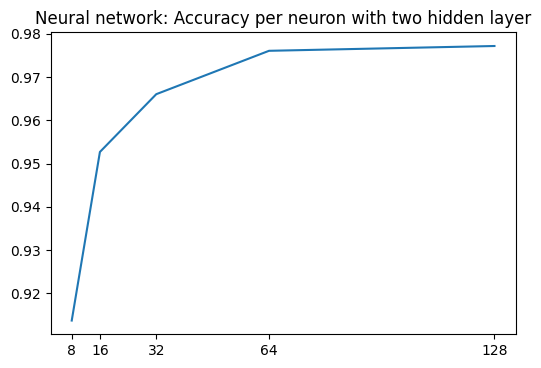

In [27]:
plt.xticks(x[:-1])
plt.plot(x[:-1],acc_nn)
plt.title('Neural network: Accuracy per neuron with two hidden layers')

Using two layers doesn't seem to improve the score a lot.

### Let's try three layers:

In [28]:
hl_list = [
    (10,10,10),(64,64,64),(128,128,128)
]

acc_nn = []
for hl in hl_list:
    acc_nn.append(np.mean(cross_validate_nn(features,target,hl = hl)))
np.mean(acc_nn)

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



0.9636504990513899

Text(0.5, 1.0, 'Neural network: Accuracy per neuron with three hidden layer')

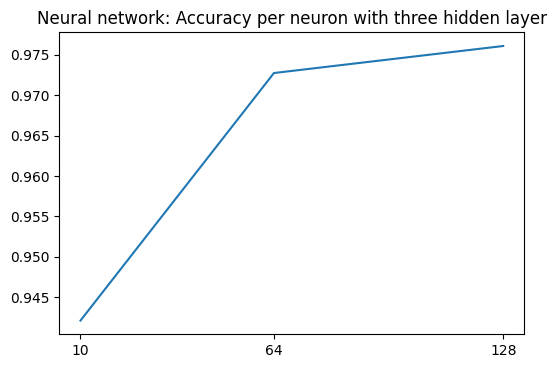

In [29]:
plt.xticks([10,64,128])
plt.plot([10,64,128],acc_nn)
plt.title('Neural network: Accuracy per neuron with three hidden layers')

Adding a third layer did not enhance the performance of the model. One or two layers were performing better, however, k-nearest neighbours was performing even slightly better.